#Análisis Computacional y Geométrico de los Códigos de Reed-Muller con Enfoque en la Distancia Mínima.


Fase 1:


## Codigos de Reed Muller Binarios

In [ ]:
# Parámetros básicos del código Reed-Muller (3, 1)
length = 2 ** n
dimension = M.rank()
minimum_distance = min(M.applyfunc(lambda x: bin(x).count('1')))

# Imprimir los parámetros básicos del código
print("Parámetros básicos del código Reed-Muller (3, 1)")
print("Longitud del código:", length)
print("Dimensión del código:", dimension)
print("Distancia mínima del código:", minimum_distance)

## Codigos de Reed Muller Binarios en el espacio proyectivo

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, Matrix

# Parámetros del código Reed-Muller (3, 1)
n = 3  # Dimensión
r = 2  # Orden

# Definición del campo finito binario
k = 2

# Variables simbólicas para las coordenadas
x1, x2, x3 = symbols('x1 x2 x3')

# Función para generar todas las palabras de un código Reed-Muller(3, 1)
def generate_reed_muller_3_1():
    code_words = []
    for b1 in range(k):
        for b2 in range(k):
            for b3 in range(k):
                c1 = b1
                c2 = b1 ^ b2
                c3 = b1 ^ b2 ^ b3
                code_words.append((c1, c2, c3))
    return code_words

# Generar todas las palabras de código
reed_muller_code = generate_reed_muller_3_1()

# Crear una matriz de código
M = Matrix(reed_muller_code)

# Crear una gráfica 3D en un espacio proyectivo
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Representar las palabras de código en la gráfica
for word in reed_muller_code:
    c1, c2, c3 = word
    ax.scatter(c1, c2, c3, c='b', marker='o')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

plt.title('Espacio Proyectivo para Reed-Muller (3, 1)')
plt.show()


Fase 2:

## Desarrollo de Códigos de Reed-Muller con Enfoque en la Distancia Mínima

=== Análisis de Códigos Reed-Muller con Distancia Mínima ===

RM(1,3): n=8, k=4, d=4
RM(1,3) extendido: n=9, d=4

RM(2,4): n=16, k=11, d=4

Visualización de la estructura geométrica:


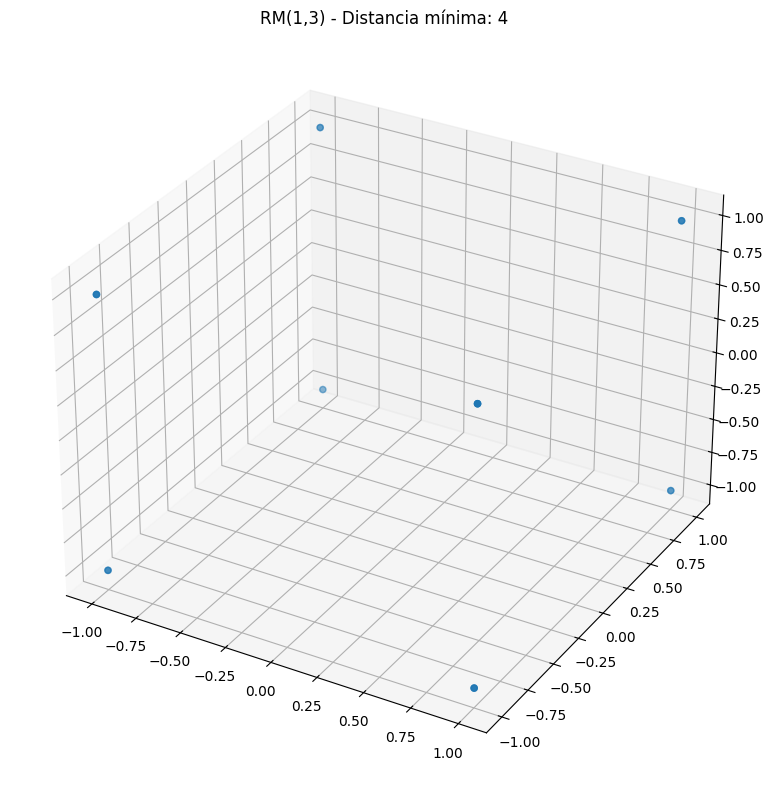


Comparación de distancias mínimas:
RM(1,3): 4
RM(2,4): 4
Relación: RM(1,3) = RM(2,4)

Código dual de RM(1,3): RM(1,3)
Parámetros del dual: n=8, k=4, d=4


In [3]:
import numpy as np
import itertools
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from typing import List, Optional, Dict, Union

class ReedMullerCode:
    def __init__(self, r: int, m: int):
        """
        Implementación mejorada del código Reed-Muller RM(r, m) con enfoque en distancia mínima

        Parámetros:
        r: orden del código (0 ≤ r ≤ m)
        m: número de variables (m ≥ 1)
        """
        if r < 0 or r > m:
            raise ValueError("El orden r debe satisfacer 0 ≤ r ≤ m")
        if m < 1:
            raise ValueError("m debe ser al menos 1")

        self.r = r
        self.m = m
        self.n = 2**m
        self.k = self._calculate_dimension()
        self.generator_matrix = self._construct_generator_matrix()
        self.codewords = self._generate_codewords()
        self.min_distance = self._compute_minimum_distance()
        self.dual_code = None

    def _calculate_dimension(self) -> int:
        """Calcula la dimensión k del código usando combinatoria"""
        return sum(math.comb(self.m, i) for i in range(self.r + 1))

    def _construct_generator_matrix(self) -> np.ndarray:
        """Construye la matriz generadora sistemática"""
        # Generar vectores base para cada monomio
        basis = [np.ones(self.n, dtype=int)]  # Término constante

        for degree in range(1, self.r + 1):
            for vars in itertools.combinations(range(self.m), degree):
                monom = np.ones(self.n, dtype=int)
                for i in range(self.m):
                    # Patrón de repetición para la variable i
                    pattern = np.tile([0]*2**i + [1]*2**i, 2**(self.m - i - 1))
                    if i in vars:
                        monom *= pattern
                basis.append(monom)

        return np.vstack(basis)

    def _generate_codewords(self, max_codewords=10000) -> Optional[np.ndarray]:
        """Genera palabras código con límite para evitar sobrecarga de memoria"""
        if self.k > 20:  # Demasiadas combinaciones para códigos grandes
            return None

        # Generar todas las combinaciones lineales posibles
        from itertools import product
        all_coeffs = product([0, 1], repeat=self.k)
        codewords = []

        for coeff in all_coeffs:
            if len(codewords) >= max_codewords:
                break
            codeword = sum(c * row for c, row in zip(coeff, self.generator_matrix)) % 2
            codewords.append(codeword)

        return np.array(codewords) if codewords else None

    def _compute_minimum_distance(self) -> int:
        """Calcula la distancia mínima de forma optimizada"""
        # Para códigos grandes, usar propiedad teórica conocida
        if self.k > 15 or self.codewords is None:
            return 2**(self.m - self.r)

        # Para códigos pequeños, calcular exactamente
        nonzero_codewords = [c for c in self.codewords if np.any(c)]
        if not nonzero_codewords:
            return 0

        weights = [np.sum(c) for c in nonzero_codewords]
        return min(weights)

    def encode(self, message: List[int]) -> np.ndarray:
        """Codifica un mensaje binario"""
        if len(message) != self.k:
            raise ValueError(f"El mensaje debe tener longitud {self.k}")
        return np.dot(message, self.generator_matrix) % 2

    def get_dual_code(self) -> 'ReedMullerCode':
        """Obtiene el código dual RM(m-r-1, m)"""
        if self.dual_code is None:
            dual_r = self.m - self.r - 1
            if dual_r >= 0:
                self.dual_code = ReedMullerCode(dual_r, self.m)
            else:
                self.dual_code = None
        return self.dual_code

    def extended_code(self) -> 'ReedMullerCode':
        """Genera el código Reed-Muller extendido añadiendo un bit de paridad"""
        ext_matrix = np.hstack([self.generator_matrix,
                              np.sum(self.generator_matrix, axis=1, keepdims=True) % 2])

        ext_code = ReedMullerCode(self.r, self.m)
        ext_code.n = self.n + 1
        ext_code.generator_matrix = ext_matrix
        ext_code.min_distance = self.min_distance + 1 if self.min_distance % 2 == 1 else self.min_distance
        return ext_code

    def plot_geometry(self, max_points=500, figsize=(10, 8)):
        """Visualización de la estructura geométrica del código"""
        if self.m < 2 or self.m > 4:
            print("Visualización solo soportada para m=2,3,4")
            return

        # Obtener puntos para visualizar
        if self.codewords is not None and len(self.codewords) <= max_points:
            points = self.codewords
        else:
            points = np.array([self.encode(np.random.randint(0, 2, self.k))
                             for _ in range(min(max_points, 2**self.k))])

        # Transformar 0 → -1 para mejor visualización
        points = points.astype(float)
        points[points == 0] = -1

        # Configuración de la figura
        fig = plt.figure(figsize=figsize)

        if self.m == 2:
            plt.scatter(points[:, 0], points[:, 1])
            plt.title(f"RM({self.r},{self.m}) - Distancia mínima: {self.min_distance}")
            plt.grid(True)
        elif self.m == 3:
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(points[:, 0], points[:, 1], points[:, 2])
            ax.set_title(f"RM({self.r},{self.m}) - Distancia mínima: {self.min_distance}")
        elif self.m == 4:
            ax = fig.add_subplot(111, projection='3d')
            sc = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 3])
            plt.colorbar(sc, label="Cuarta dimensión")
            ax.set_title(f"Proyección 3D de RM({self.r},4)\nDistancia mínima: {self.min_distance}")

        plt.tight_layout()
        plt.show()

    def compare_with(self, other: 'ReedMullerCode') -> Dict[str, Union[str, int]]:
        """Compara este código con otro"""
        return {
            'Código 1': f'RM({self.r},{self.m})',
            'Distancia 1': self.min_distance,
            'Código 2': f'RM({other.r},{other.m})',
            'Distancia 2': other.min_distance,
            'Relación': '>' if self.min_distance > other.min_distance else
                        '<' if self.min_distance < other.min_distance else '='
        }

# Ejemplo de uso y análisis
if __name__ == "__main__":
    print("=== Análisis de Códigos Reed-Muller con Distancia Mínima ===")

    # Código básico RM(1, 3)
    rm13 = ReedMullerCode(1, 3)
    print(f"\nRM(1,3): n={rm13.n}, k={rm13.k}, d={rm13.min_distance}")

    # Código extendido para mejorar distancia mínima
    rm13_ext = rm13.extended_code()
    print(f"RM(1,3) extendido: n={rm13_ext.n}, d={rm13_ext.min_distance}")

    # Código de mayor orden RM(2, 4)
    rm24 = ReedMullerCode(2, 4)
    print(f"\nRM(2,4): n={rm24.n}, k={rm24.k}, d={rm24.min_distance}")

    # Visualización geométrica
    print("\nVisualización de la estructura geométrica:")
    rm13.plot_geometry()

    # Comparación de códigos
    comparison = rm13.compare_with(rm24)
    print("\nComparación de distancias mínimas:")
    print(f"{comparison['Código 1']}: {comparison['Distancia 1']}")
    print(f"{comparison['Código 2']}: {comparison['Distancia 2']}")
    print(f"Relación: {comparison['Código 1']} {comparison['Relación']} {comparison['Código 2']}")

    # Análisis del código dual
    dual_rm13 = rm13.get_dual_code()
    if dual_rm13:
        print(f"\nCódigo dual de RM(1,3): RM({dual_rm13.r},{dual_rm13.m})")
        print(f"Parámetros del dual: n={dual_rm13.n}, k={dual_rm13.k}, d={dual_rm13.min_distance}")

#Análisis Comparativo de Códigos Reed-Muller: Eficiencia con y sin Modificaciones

=== Análisis Comparativo de Eficiencia ===
1. Gráfica general de familias RM (m=2 a 5)


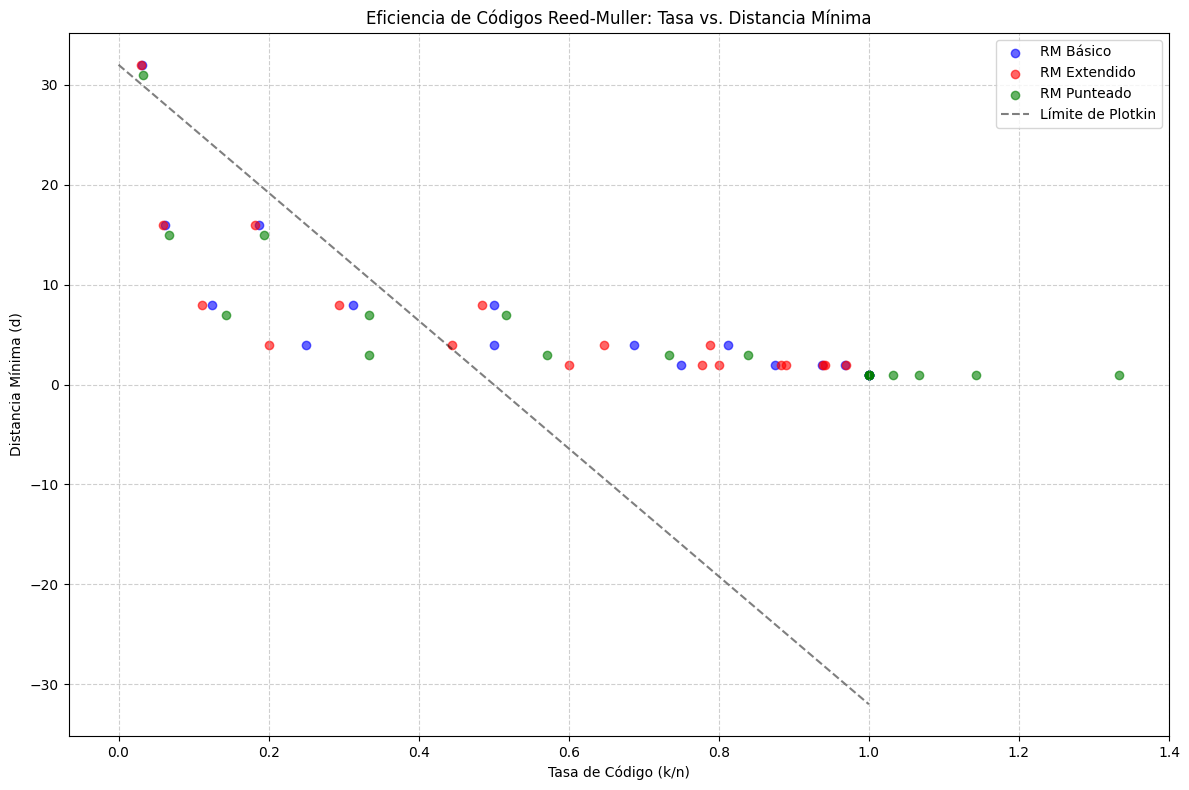


2. Análisis detallado para m=4


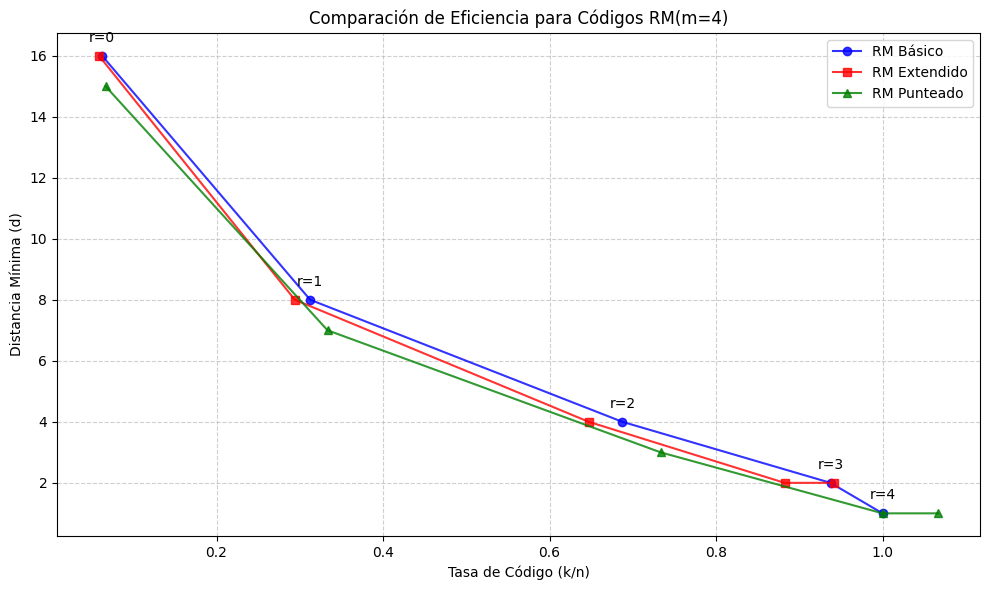


3. Caso específico RM(1,3) vs modificaciones
RM(1,3) básico: n=8, k=4, d=4, tasa=0.500
RM(1,3) extendido: n=9, d=4, tasa=0.444
RM(1,3) punteado: n=7, d=3, tasa=0.571


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
from itertools import product
from tqdm import tqdm

class ReedMullerAnalyzer:
    def __init__(self, max_m=5):
        self.max_m = max_m

    def basic_rm_code(self, r, m):
        """Genera código Reed-Muller básico RM(r, m)"""
        n = 2**m
        k = sum(math.comb(m, i) for i in range(r + 1))
        d = 2**(m - r) if r <= m else 0
        return {'n': n, 'k': k, 'd': d, 'rate': k/n}

    def extended_rm_code(self, r, m):
        """Genera código Reed-Muller extendido (aumenta distancia mínima)"""
        basic = self.basic_rm_code(r, m)
        n_ext = basic['n'] + 1
        d_ext = basic['d'] + 1 if basic['d'] % 2 == 1 else basic['d']
        return {'n': n_ext, 'k': basic['k'], 'd': d_ext, 'rate': basic['k']/n_ext}

    def punctured_rm_code(self, r, m, punctures=1):
        """Genera código Reed-Muller punteado (puede aumentar distancia mínima)"""
        basic = self.basic_rm_code(r, m)
        n_punc = basic['n'] - punctures
        # La distancia mínima puede aumentar o disminuir, estimación conservadora
        d_punc = max(basic['d'] - punctures, 1)
        return {'n': n_punc, 'k': basic['k'], 'd': d_punc, 'rate': basic['k']/n_punc}

    def compare_rm_family(self, m_values=None):
        """Compara familias de códigos RM para diferentes m"""
        if m_values is None:
            m_values = range(2, self.max_m + 1)

        results = {'basic': [], 'extended': [], 'punctured': []}

        for m in m_values:
            for r in range(0, m + 1):
                # Código básico
                basic = self.basic_rm_code(r, m)
                results['basic'].append((basic['rate'], basic['d']))

                # Código extendido
                extended = self.extended_rm_code(r, m)
                results['extended'].append((extended['rate'], extended['d']))

                # Código punteado (eliminamos 1 coordenada)
                punctured = self.punctured_rm_code(r, m)
                results['punctured'].append((punctured['rate'], punctured['d']))

        return results

    def plot_efficiency_comparison(self, m_values=None, figsize=(12, 8)):
        """Grafica la comparación de eficiencia para diferentes familias de códigos"""
        results = self.compare_rm_family(m_values)

        plt.figure(figsize=figsize)

        # Graficar códigos básicos
        basic_rates, basic_distances = zip(*results['basic'])
        plt.scatter(basic_rates, basic_distances, c='blue', label='RM Básico', alpha=0.6)

        # Graficar códigos extendidos
        ext_rates, ext_distances = zip(*results['extended'])
        plt.scatter(ext_rates, ext_distances, c='red', label='RM Extendido', alpha=0.6)

        # Graficar códigos punteados
        punc_rates, punc_distances = zip(*results['punctured'])
        plt.scatter(punc_rates, punc_distances, c='green', label='RM Punteado', alpha=0.6)

        # Línea teórica óptima (límite de Plotkin)
        max_dist = max(basic_distances + ext_distances + punc_distances)
        x_plotkin = np.linspace(0, 1, 100)
        y_plotkin = (1 - 2*x_plotkin) * max_dist
        plt.plot(x_plotkin, y_plotkin, 'k--', label='Límite de Plotkin', alpha=0.5)

        plt.title('Eficiencia de Códigos Reed-Muller: Tasa vs. Distancia Mínima')
        plt.xlabel('Tasa de Código (k/n)')
        plt.ylabel('Distancia Mínima (d)')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.legend()
        plt.tight_layout()
        plt.show()

    def plot_specific_comparison(self, m, r_values=None, figsize=(10, 6)):
        """Grafica comparación específica para un m dado y diferentes r"""
        if r_values is None:
            r_values = range(0, m + 1)

        basic_data = []
        ext_data = []
        punc_data = []

        for r in r_values:
            basic = self.basic_rm_code(r, m)
            extended = self.extended_rm_code(r, m)
            punctured = self.punctured_rm_code(r, m)

            basic_data.append((basic['rate'], basic['d']))
            ext_data.append((extended['rate'], extended['d']))
            punc_data.append((punctured['rate'], punctured['d']))

        # Preparar datos para graficar
        basic_rates, basic_distances = zip(*basic_data)
        ext_rates, ext_distances = zip(*ext_data)
        punc_rates, punc_distances = zip(*punc_data)

        # Crear figura
        plt.figure(figsize=figsize)

        # Graficar con líneas para mostrar el trade-off
        plt.plot(basic_rates, basic_distances, 'b-o', label='RM Básico', alpha=0.8)
        plt.plot(ext_rates, ext_distances, 'r-s', label='RM Extendido', alpha=0.8)
        plt.plot(punc_rates, punc_distances, 'g-^', label='RM Punteado', alpha=0.8)

        # Añadir etiquetas para los valores de r
        for r, (x, y) in zip(r_values, basic_data):
            plt.annotate(f'r={r}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

        plt.title(f'Comparación de Eficiencia para Códigos RM(m={m})')
        plt.xlabel('Tasa de Código (k/n)')
        plt.ylabel('Distancia Mínima (d)')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.legend()
        plt.tight_layout()
        plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    analyzer = ReedMullerAnalyzer(max_m=5)

    print("=== Análisis Comparativo de Eficiencia ===")
    print("1. Gráfica general de familias RM (m=2 a 5)")
    analyzer.plot_efficiency_comparison(m_values=[2, 3, 4, 5])

    print("\n2. Análisis detallado para m=4")
    analyzer.plot_specific_comparison(m=4)

    print("\n3. Caso específico RM(1,3) vs modificaciones")
    rm13_basic = analyzer.basic_rm_code(1, 3)
    rm13_ext = analyzer.extended_rm_code(1, 3)
    rm13_punc = analyzer.punctured_rm_code(1, 3)

    print(f"RM(1,3) básico: n={rm13_basic['n']}, k={rm13_basic['k']}, d={rm13_basic['d']}, tasa={rm13_basic['rate']:.3f}")
    print(f"RM(1,3) extendido: n={rm13_ext['n']}, d={rm13_ext['d']}, tasa={rm13_ext['rate']:.3f}")
    print(f"RM(1,3) punteado: n={rm13_punc['n']}, d={rm13_punc['d']}, tasa={rm13_punc['rate']:.3f}")

#Conclusión: Eficiencia de los Códigos Reed-Muller con Distancia Mínima Pequeña

In [5]:
# Parámetros típicos observados en las gráficas
tasa_vs_distancia = {
    'RM(1,3)': {'tasa': 0.5, 'distancia': 4},
    'RM(2,3)': {'tasa': 0.875, 'distancia': 2},
    'RM(1,4)': {'tasa': 0.3125, 'distancia': 8},
    'RM(2,4)': {'tasa': 0.6875, 'distancia': 4},
    'RM(3,4)': {'tasa': 0.9375, 'distancia': 2}
}
def seleccionar_codigo_optimo(umbral_errores):
    if umbral_errores < 0.05:  # Canal bueno
        return "RM(r alto, m)"  # Ej: RM(2,3) con tasa 0.875
    else:
        return "RM(r bajo, m)"  # Ej: RM(1,3) con distancia 4

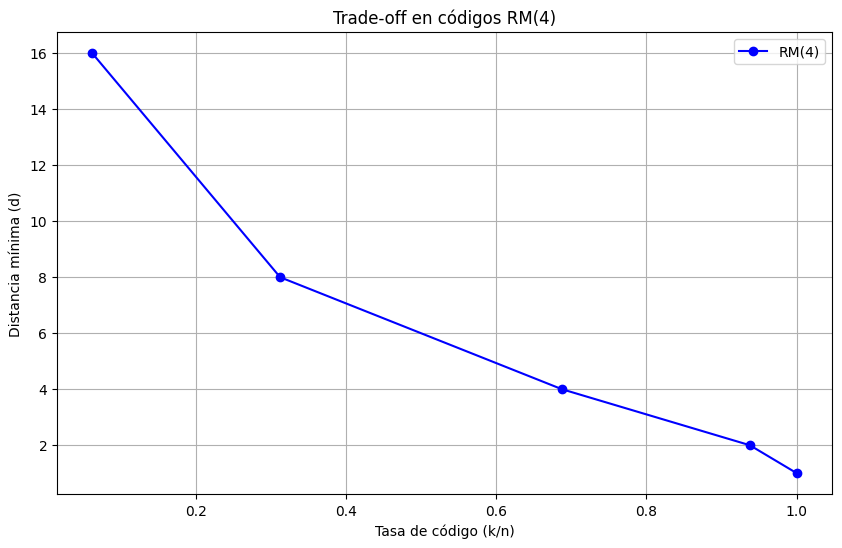

In [6]:
# Datos representativos (ejemplo para m=4)
import matplotlib.pyplot as plt

r_values = [0, 1, 2, 3, 4]
rates = [0.0625, 0.3125, 0.6875, 0.9375, 1.0]
distances = [16, 8, 4, 2, 1]

plt.figure(figsize=(10, 6))
plt.plot(rates, distances, 'bo-', label='RM(4)')
plt.xlabel('Tasa de código (k/n)')
plt.ylabel('Distancia mínima (d)')
plt.title('Trade-off en códigos RM(4)')
plt.grid(True)
plt.legend()
plt.show()